<a href="https://colab.research.google.com/github/lattehauma/dacon/blob/main/dacon_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#데이터 불러오기, 확인하기

In [2]:
test=pd.read_csv('/content/drive/MyDrive/colab/dacon/test.csv')
train=pd.read_csv('/content/drive/MyDrive/colab/dacon/train.csv')

In [3]:
print(train.shape)
train.head()

(1955, 20)


,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34df3d8b90>,
      dtype=object)

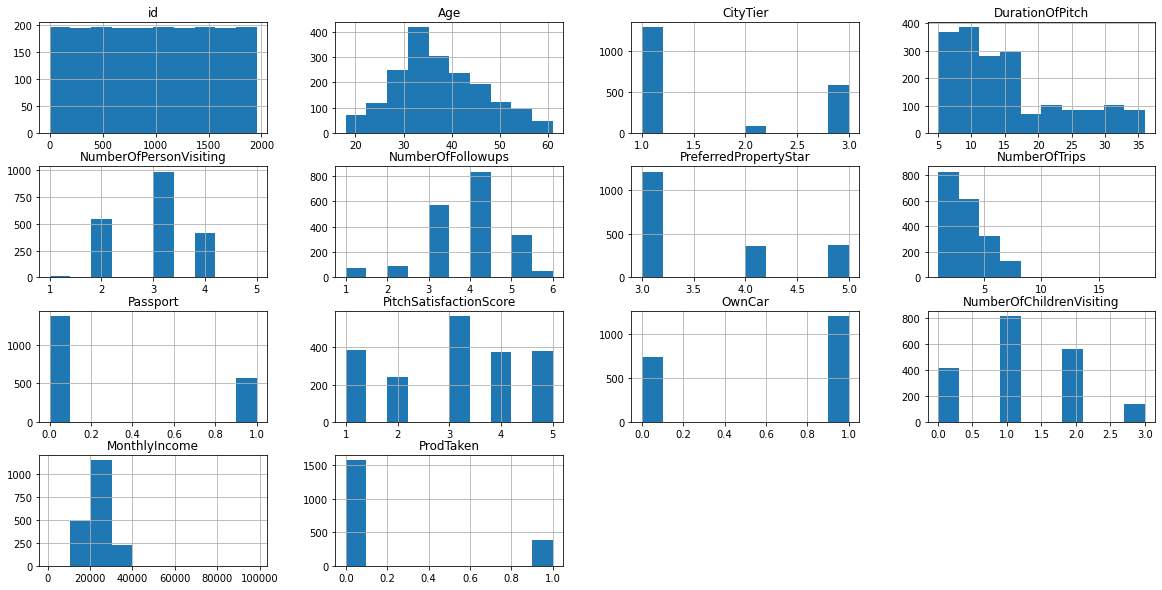

In [3]:
train.hist(figsize=(20,10))

* id : 샘플 아이디
Age : 나이

* TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
*CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
* DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
* Occupation : 직업
* Gender : 성별
* NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
* NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
* ProductPitched : 영업 사원이 제시한 상품
* PreferredPropertyStar : 선호 호텔 숙박업소 등급
* MaritalStatus : 결혼여부
* NumberOfTrips : 평균 연간 여행 횟수
* Passport : 여권 보유 여부 (0: 없음, 1: 있음)
* PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
* OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
* NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
* Designation : (직업의) 직급
* MonthlyIncome : 월 급여
* ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

#데이터 전처리

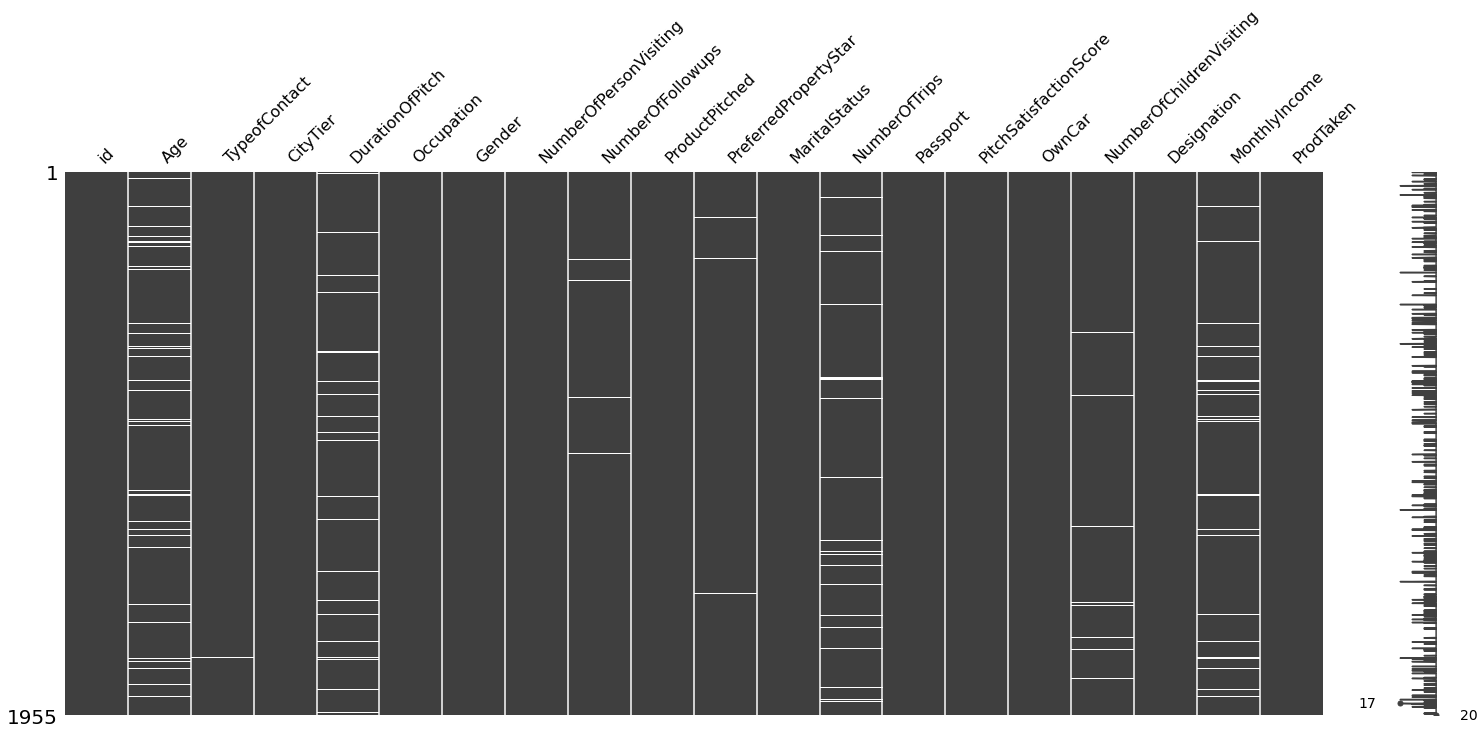

In [ ]:
import missingno as msno
msno.matrix(train)

아니 뭔 연령 변수에 이렇게 ...결측치가 많은건가요

In [ ]:
train.isnull().sum()/(train.shape[0])*100

id                          0.000000
Age                         4.808184
TypeofContact               0.511509
CityTier                    0.000000
DurationOfPitch             5.217391
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.664962
ProductPitched              0.000000
PreferredPropertyStar       0.511509
MaritalStatus               0.000000
NumberOfTrips               2.915601
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.381074
Designation                 0.000000
MonthlyIncome               5.115090
ProdTaken                   0.000000
dtype: float64

결측치가 많이 있는데 그래도 10퍼센트 넘는거 없는 것 같으니까 되도록이면 거의 다 채워주는 방향으로 해봅시다.

(416, 20)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


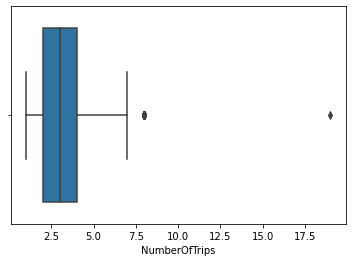

In [ ]:
sns.boxplot(train['NumberOfTrips'])
print(train[train['NumberOfChildrenVisiting']==0].shape)

연령은 구매에 영향을 어느정도 미치는 것 같음 -> 예측 모델로 결측치를 집어 넣는 걸로 합시다


* Type : 그냥 0으로 대체 해도 될 것 같음 데이터가 없다는 건 아마 기업 프로모션은 아닌 것 같으니까
* duration, followup: 데이터가 없다는 건 아마도 0으로 설정해도 될 듯 일단 해보고 이상하면 수정하도록 하겠습니다.
* preferred: 평균으로 집어넣어야 겠다
* trip: 0이 없는 걸로 봐서 결측치가 0을 의미하는 것 같음
* children: 일단은 평균으로 넣어줬습니다.
* Income: 평균으로 넣을까 아니면 머신러닝으로 대체해서 넣을까

결측치 채워주기

In [3]:
train['TypeofContact']=train['TypeofContact'].fillna(0)
train['DurationOfPitch']=train['DurationOfPitch'].fillna(0)
train['NumberOfFollowups']=train['NumberOfFollowups'].fillna(0)
train['NumberOfTrips']=train['NumberOfTrips'].fillna(0)
train['PreferredPropertyStar']=train['PreferredPropertyStar'].fillna(train['PreferredPropertyStar'].mean())
train['NumberOfChildrenVisiting']=train['NumberOfChildrenVisiting'].fillna(train['NumberOfChildrenVisiting'].mean())

### 데이터 정리
* 데이터 타입 변경
* one hot encoding

In [5]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,0.0,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,0.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


object class 데이터 들은 숫자 데이터로 바꿔줘도 될 것 같다

In [4]:
train['TypeofContact']=train['TypeofContact'].apply(lambda x: 1 if x=='Company Invited' else 0)

In [5]:
train['Gender']=train['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [6]:
def num_pro(x):
  y=''
  if x == 'Basic': y=1
  elif x == 'Deluxe': y=2
  elif x == 'Standard': y=3
  elif x == 'Super Deluxe': y=4
  else: y=5
  return y

#함수 적용
train["ProductPitched"] = train["ProductPitched"].apply(lambda x: num_pro(x))

In [7]:
def num_des(x):
  y=''
  if x == 'Executive': y=1
  elif x == 'Manager': y=2
  elif x == 'Senior Manager': y=3
  elif x == 'AVP': y=4
  else: y=5
  return y

#함수 적용
train["Designation"] = train["Designation"].apply(lambda x: num_des(x))

범주형 데이터 변경해주기

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
fdata=train.drop(['Occupation','MaritalStatus'], axis=1)
categ_columns=['Occupation','MaritalStatus']

In [9]:
def dummy(data, col):
  lab=LabelEncoder()
  aa=lab.fit_transform(data[col]).reshape(-1,1)
  ohe=OneHotEncoder(sparse=False)
  column_names=[col+'_'+str(i) for i in lab.classes_]
  return(pd.DataFrame(ohe.fit_transform(aa), columns=column_names))
  

In [10]:
for column in categ_columns:
  temp_df=dummy(train, column)
  fdata=pd.concat([fdata,temp_df], axis=1)
fdata.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,...,MonthlyIncome,ProdTaken,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,1,28.0,1,1,10.0,1,3,4.0,1,3.0,...,20384.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,34.0,0,3,0.0,0,2,4.0,2,4.0,...,19599.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,45.0,1,1,0.0,1,2,3.0,2,4.0,...,NaN,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,29.0,1,1,7.0,1,3,5.0,1,4.0,...,21274.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,42.0,0,3,6.0,1,2,3.0,2,3.0,...,19907.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### 결측치를 한 번 채워볼게요


In [11]:
train=fdata

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

일단 Age변수를 채우는 걸로

In [13]:
missing_columns = ["Age", "MonthlyIncome"]

In [14]:
x=train[train['Age'].notnull()].drop(['id','Age','MonthlyIncome'], axis=1)
y=train[train['Age'].notnull()]['Age']

In [15]:
x_m=train[train['Age'].isnull()].drop(['id','Age','MonthlyIncome'], axis=1)

In [16]:
lr.fit(x,y)
y_m=lr.predict(x_m)

In [17]:
y_m=pd.DataFrame(y_m, index=x_m.index)

In [18]:
y_m.columns=['Age']

In [19]:
fin_data=pd.merge(train, y_m, how='left', left_index=True,right_index=True)

In [20]:
fin_data[['Age_x','Age_y']]=fin_data[['Age_x','Age_y']].fillna(0)

In [21]:
fin_data['Age']=round(fin_data['Age_x']+fin_data['Age_y'],3)

In [22]:
fin_data=fin_data.drop(['Age_x','Age_y'], axis=1)

이제 monthly income을 채울 것이다

In [23]:
x=fin_data[fin_data['MonthlyIncome'].notnull()].drop(['id','Age','MonthlyIncome'], axis=1)
y=fin_data[fin_data['MonthlyIncome'].notnull()]['MonthlyIncome']
x_m=fin_data[fin_data['MonthlyIncome'].isnull()].drop(['id','Age','MonthlyIncome'], axis=1)

In [24]:
lr.fit(x,y)
y_m=lr.predict(x_m)
y_m=pd.DataFrame(y_m, index=x_m.index)

In [25]:
y_m.columns=['MonthlyIncome']

In [26]:
fin_data2=pd.merge(fin_data, y_m, how='left', left_index=True,right_index=True)
fin_data2[['MonthlyIncome_x','MonthlyIncome_y']]=fin_data2[['MonthlyIncome_x','MonthlyIncome_y']].fillna(0)
fin_data2['MonthlyIncome']=round(fin_data2['MonthlyIncome_x']+fin_data2['MonthlyIncome_y'],3)
fin_data2=fin_data2.drop(['MonthlyIncome_x','MonthlyIncome_y'], axis=1)


다채웠어요

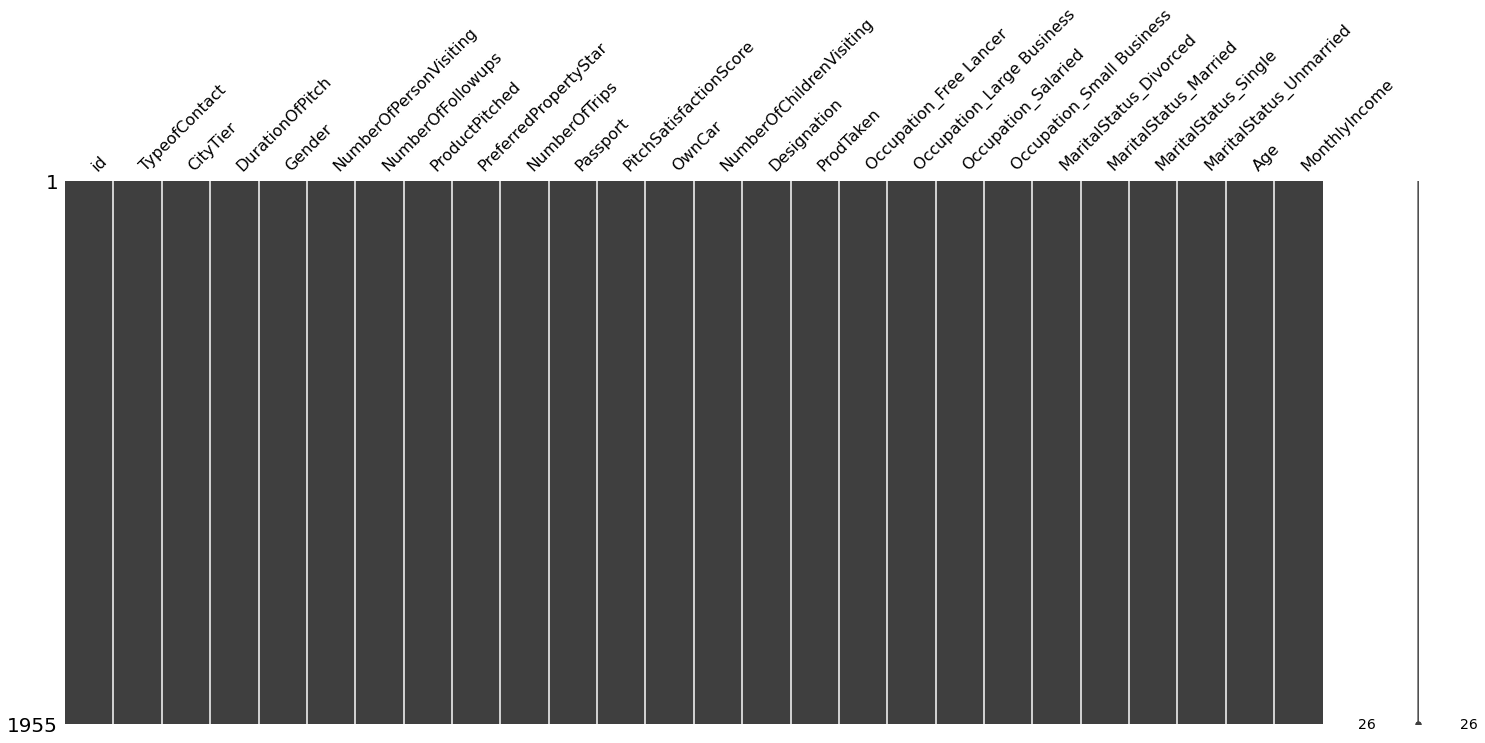

In [27]:
import missingno as msno
msno.matrix(fin_data2)

In [28]:
train=fin_data2

In [29]:
train.head()

,id,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,...,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Age,MonthlyIncome
0,1,1,1,10.0,1,3,4.0,1,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,28.0,20384.000
1,2,0,3,0.0,0,2,4.0,2,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,34.0,19599.000
2,3,1,1,0.0,1,2,3.0,2,4.0,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,45.0,21156.235
3,4,1,1,7.0,1,3,5.0,1,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,29.0,21274.000
4,5,0,3,6.0,1,2,3.0,2,3.0,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,42.0,19907.000


### EDA

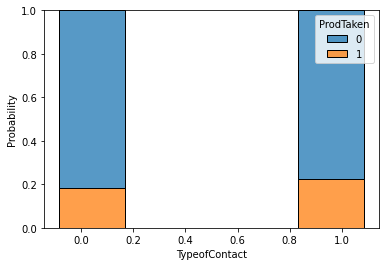

In [36]:
sns.histplot(train, x="TypeofContact", hue="ProdTaken", stat="probability", multiple="fill",shrink=-3)

별로 차이가 많이 안나는 것 같긴 한데 그래도 조금 차이가 난다. 홍보 관련 내용이면 number of followup 변수랑도 겹치는 부분이 있을 것 같음

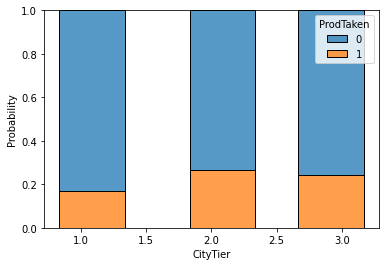

In [37]:
sns.histplot(train, x="CityTier", hue="ProdTaken", stat="probability", multiple="fill",shrink=-3)

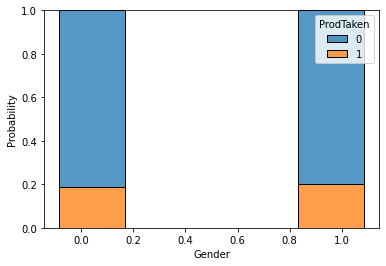

In [41]:
sns.histplot(train, x="Gender", hue="ProdTaken", stat="probability", multiple="fill",shrink=-3)

In [39]:
yes=train[train['ProdTaken']==1]
no=train[train['ProdTaken']==0]
print(yes.shape)
print(no.shape)

(383, 26)
(1572, 26)


2,3 등급이 등록하는 비율이 조금 더 높은가?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


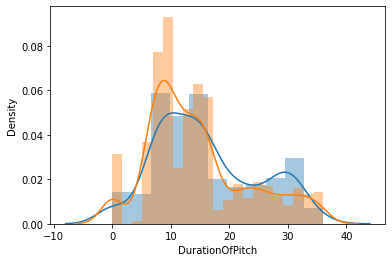

In [40]:
sns.distplot(yes['DurationOfPitch'])
sns.distplot(no['DurationOfPitch'])

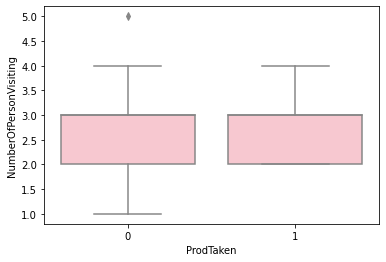

In [46]:
sns.boxplot(y=train['NumberOfPersonVisiting'], color='pink', x=train['ProdTaken'])

인원이 1명인게 없어...? 

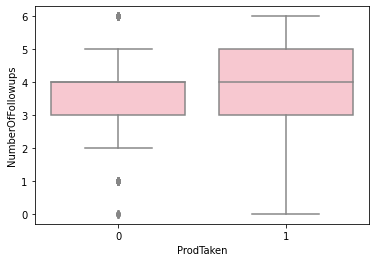

In [47]:
sns.boxplot(y=train['NumberOfFollowups'], color='pink', x=train['ProdTaken'])

이거는 차이가 조금 있네

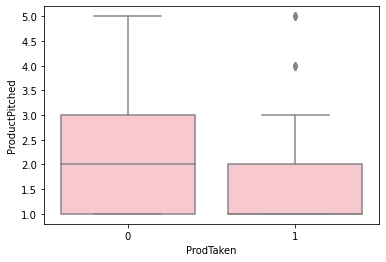

In [49]:
sns.boxplot(y=train['ProductPitched'], color='pink', x=train['ProdTaken'])

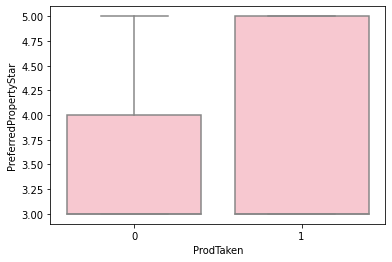

In [50]:
sns.boxplot(y=train['PreferredPropertyStar'], color='pink', x=train['ProdTaken'])

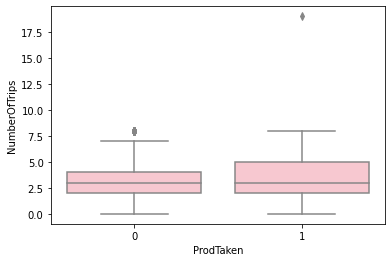

In [51]:
sns.boxplot(y=train['NumberOfTrips'], color='pink', x=train['ProdTaken'])

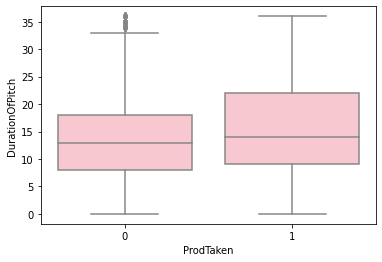

In [ ]:
sns.boxplot(y=train['DurationOfPitch'], color='pink', x=train['ProdTaken'])

홍보기간에 따라서 살짝 차이가 있는 것 같기는 하다. 평균은 비슷한가? Q3가 확실히 다른걸로 봐서 홍보기간이 길수록 등록하는 경향성은 있는듯

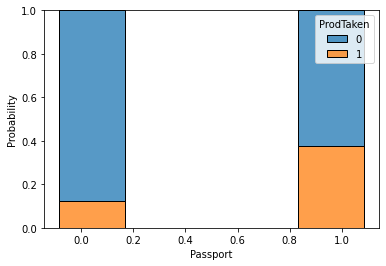

In [52]:
sns.histplot(train, x="Passport", hue="ProdTaken", stat="probability", multiple="fill",shrink=-3)

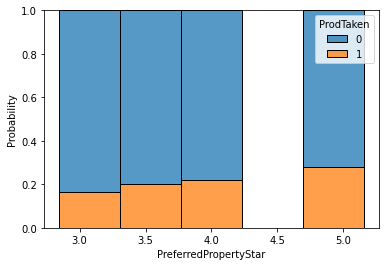

In [54]:
sns.histplot(train, x="PreferredPropertyStar", hue="ProdTaken", stat="probability", multiple="fill",shrink=-3)

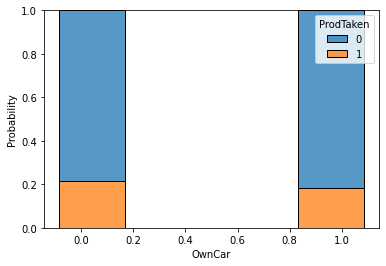

In [55]:
sns.histplot(train, x="OwnCar", hue="ProdTaken", stat="probability", multiple="fill",shrink=-3)

오...약간 경향성이 보이는 것 같다

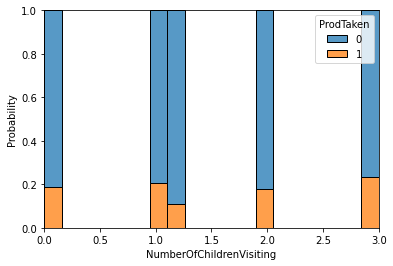

In [61]:
sns.histplot(train, x="NumberOfChildrenVisiting", hue="ProdTaken", stat="probability", multiple="fill")

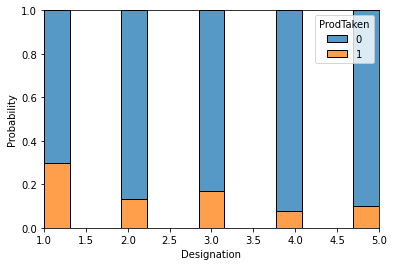

In [62]:
sns.histplot(train, x="Designation", hue="ProdTaken", stat="probability", multiple="fill")

낮은...등급이 더 여행을 많이 가는 경향이 있는 것 같은데?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


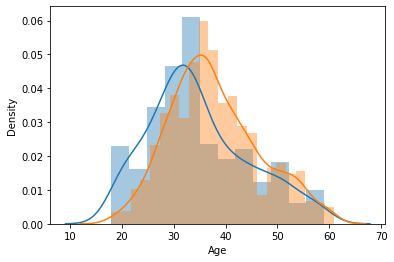

In [63]:
sns.distplot(yes['Age'])
sns.distplot(no['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(10000.0, 50000.0)

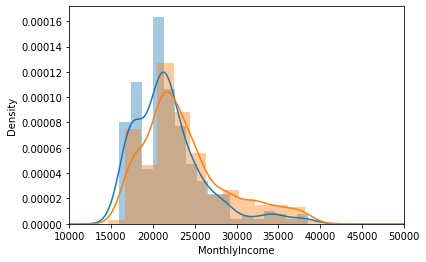

In [66]:
sns.distplot(yes['MonthlyIncome'])
sns.distplot(no['MonthlyIncome'])
plt.xlim(10000,50000)

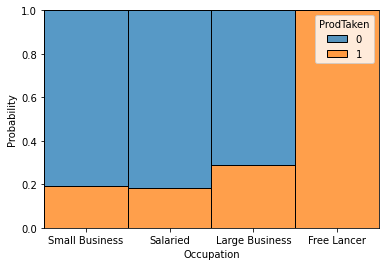

In [ ]:
sns.histplot(train, x="Occupation", hue="ProdTaken", stat="probability", multiple="fill")

프리랜서 뭐임??? 
프리랜서 확인해보니까 한 명밖에 없더라고... 이렇게 처리해도 될지는 모르겠지만 일단은 그대로 가겠습니다. test에도 Free lancer 딱 한 명 있더라고....

In [75]:
train.columns

Index(['id', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'ProdTaken', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Age', 'MonthlyIncome'],
      dtype='object')

In [78]:
aa=train[['TypeofContact', 'CityTier', 'DurationOfPitch', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'ProdTaken', 'Age', 'MonthlyIncome']]
table1=aa.corr()

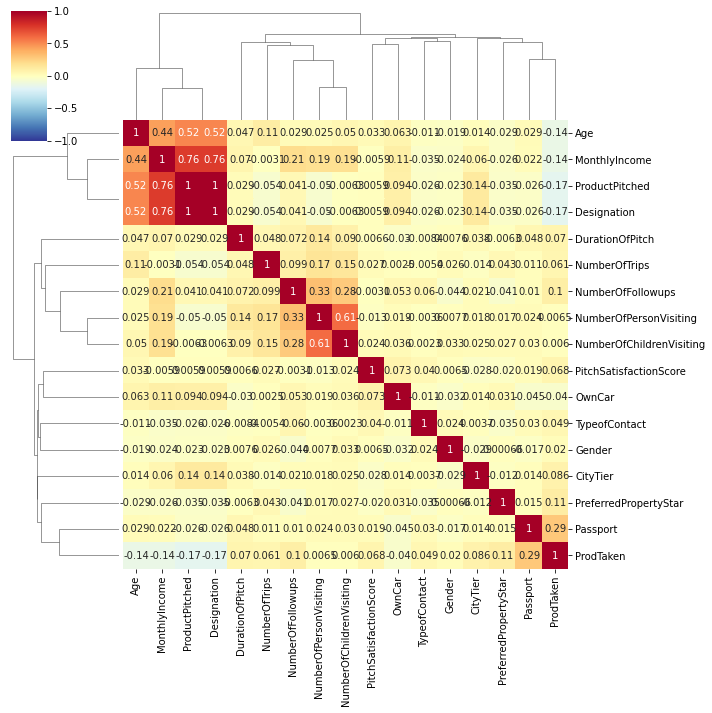

In [79]:
sns.clustermap(table1, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

수입, 연령, 직위 같은 것들은 높은 연관성을 보이는게 납득이 간다.
* 동행인 숫자랑 동행하는 어린이 숫자는 생각해보니까 당연히 높은 연관도를 보이는게 맞음
* prodtaken 과 연관성이 높은거는... passtport 그리고 수입관련 네가지 변수들? 그리고 별점관련이 좀 높은 것 같습니다.
* PCA 를 해야할 수 있겠다.

# 모델링

In [30]:
train=train.drop(['id'],axis=1)

In [32]:
train.columns

Index(['TypeofContact', 'CityTier', 'DurationOfPitch', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'ProdTaken', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Age', 'MonthlyIncome'],
      dtype='object')

In [34]:
X=train.drop(['ProdTaken'], axis=1)
y=train['ProdTaken']

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val=train_test_split(X,y, test_size=0.3, random_state=1)

In [49]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1368, 24)
(587, 24)
(1368,)
(587,)


### 일단 가장 기본적인 모델링

In [50]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(C=1e2, multi_class='ovr', random_state=1,
                         max_iter=200)

In [51]:
from sklearn.metrics import accuracy_score

logit.fit(x_train,y_train)
y_train_pred=logit.predict(x_train)
print(accuracy_score(y_train,y_train_pred))

0.8435672514619883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [52]:
y_val_pred=logit.predict(x_val)
print(accuracy_score(y_val,y_val_pred))

0.8245315161839863


### cutoff 사용한 모델링

In [54]:
cut=sum(y_train)/len(y_train)
cut

0.18421052631578946

확률이 많지 않음... 20퍼 정도밖에 안되는 것 같은데 근데...cutoff가 상당히 적용이 잘 안되네요 

In [62]:
y_train_pred = logit.predict_proba(x_train)[:,1] >= 0.5
y_val_pred = logit.predict_proba(x_val)[:,1] >= 0.5
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_val,y_val_pred))

0.8435672514619883
0.8245315161839863


### 불균형 자료 처리

In [68]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

Counter(y_train)

Counter({0: 1116, 1: 252})

In [76]:
sm=ADASYN(random_state=42)
x_res, y_res=sm.fit_resample(x_train,y_train)
Counter(y_res)

Counter({0: 1116, 1: 1074})

In [77]:
from sklearn.metrics import accuracy_score

logit.fit(x_res,y_res)
y_res_pred=logit.predict(x_res)
print(accuracy_score(y_res,y_res_pred))

0.7378995433789954


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


어이가없음요 

In [78]:
y_val_pred=logit.predict(x_val)
print(accuracy_score(y_val,y_val_pred))

0.6916524701873935


### 그렇다면 decision tree를 써볼게요

In [79]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [82]:
y_train_pred=dtc.predict(x_train)
y_val_pred=dtc.predict(x_val)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_val,y_val_pred))

0.8340643274853801
0.8091993185689949


In [85]:
y_train_pred = dtc.predict_proba(x_train)[:,1] >= 0.45
y_val_pred = dtc.predict_proba(x_val)[:,1] >= 0.45
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_val,y_val_pred))

0.8252923976608187
0.8313458262350937


가장 최신형 모델을 사용해 볼까요

PCA 하고...초모수 조정하고... 그래야할 것같음